In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Load the data
data = np.loadtxt("kmeans_data.txt")

# Number of clusters and Landmarks (given)
K = 2
L = 1

In [12]:
# RBF kernel function
def rbf_kernel(x1, x2, gamma=0.1):
    return np.exp(-gamma * np.sum((x1 - x2) ** 2))

# Function to get the Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [13]:
# Function to assign each point to the closest centroid
def assign_clusters(data, centroids):
    clusters = np.zeros(data.shape[0])
    for i, point in enumerate(data):
        distances = np.array([euclidean_distance(point, centroid) for centroid in centroids])
        clusters[i] = np.argmin(distances)
    return clusters

def update_centroids(data, clusters, K):
    new_centroids = np.zeros((K, data.shape[1]))
    for i in range(K):
        points = data[clusters == i]
        mean = np.mean(points, axis=0)
        new_centroids[i] = mean
    return new_centroids

# Function to run the K-means algorithm
def kmeans(data, K, max_iters = 100):
    centroids = data[:K]
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [14]:
# Function to plot the clustered data
def plot_data(data, clusters, landmark):
    colors = ["red", "green"]
    plt.figure(figsize=(8, 6))
    for i in range(2):
        plt.scatter(data[clusters == i, 0], data[clusters == i, 1], c=colors[i], label=f"Cluster {i + 1}")
    plt.scatter(landmark[0], landmark[1], c="blue", marker="o", s=100, label="Landmark")
    plt.title("K-means clustering with landmark-based approach")
    plt.legend()
    plt.show()

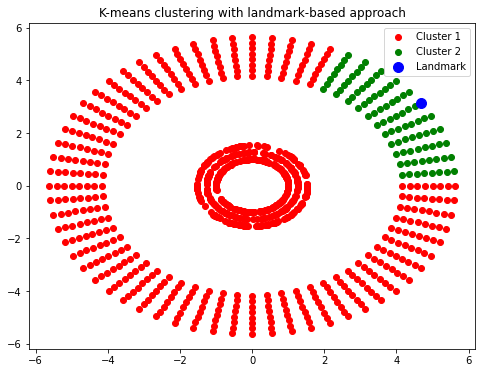

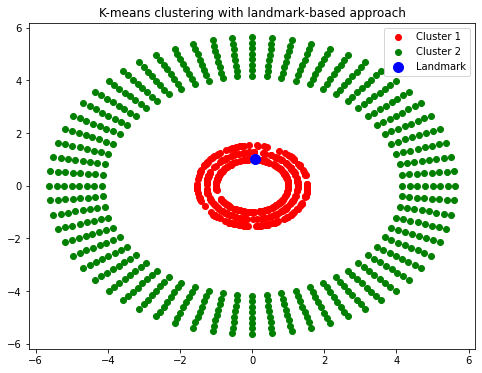

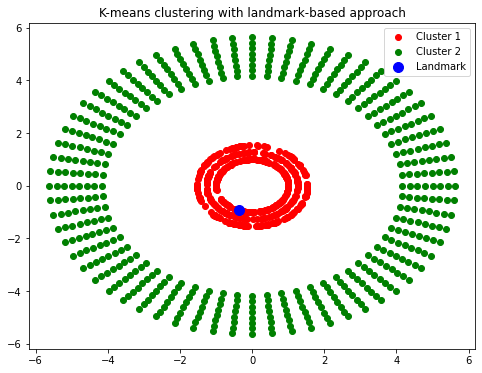

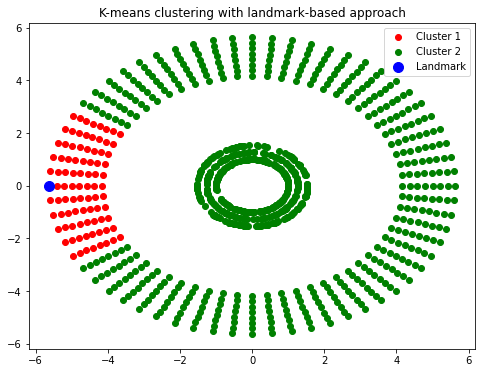

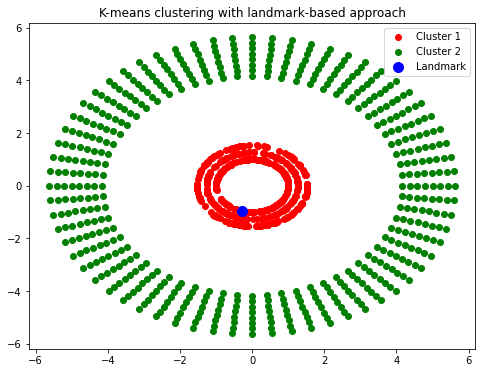

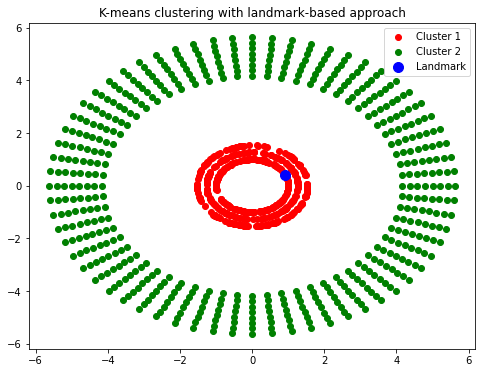

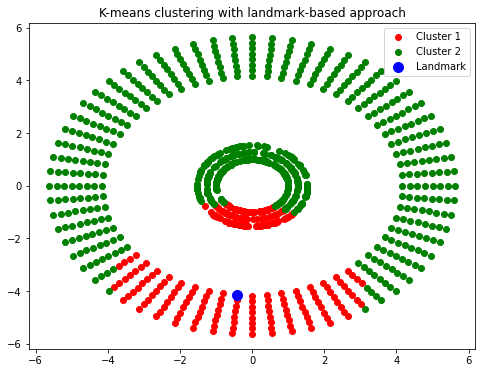

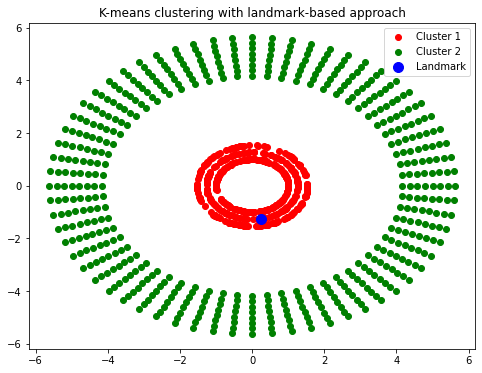

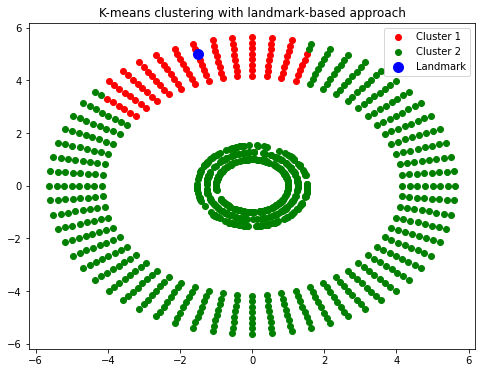

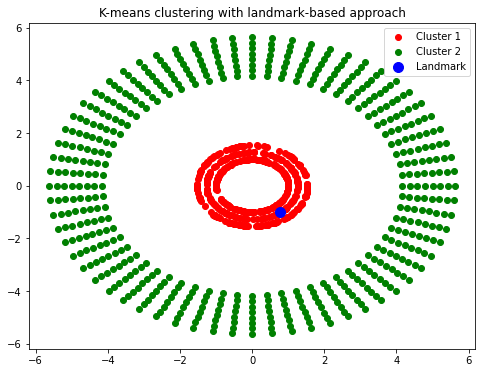

In [15]:
# Running the landmark based approach for 10 times with random landmarks
for i in range(10):
    landmark = data[np.random.randint(data.shape[0])]
    data_transformed = np.array([rbf_kernel(point, landmark) for point in data])
    data_transformed = data_transformed.reshape(-1, 1)
    centroids, clusters = kmeans(data_transformed, K)
    plot_data(data, clusters, landmark)